In [130]:
"""pip install tensorflow"""

'pip install tensorflow'

In [131]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [132]:
test_dir= '/kaggle/input/cat-and-dog/test_set/test_set'
train_dir= '/kaggle/input/cat-and-dog/training_set/training_set'

In [133]:
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
)

Found 8005 files belonging to 2 classes.


In [134]:
class_names= train_ds.class_names
class_names

['cats', 'dogs']

In [135]:
test_ds= tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
)

Found 2023 files belonging to 2 classes.


In [136]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


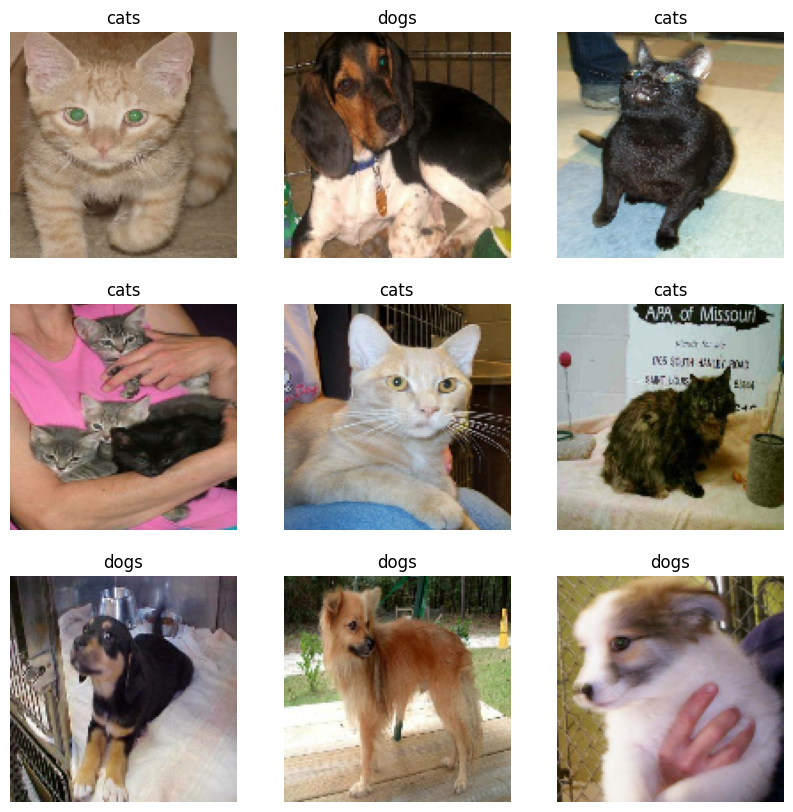

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Normalization Layer

In [138]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


# Apply Normalization Layer

In [139]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [140]:
# Prefetching for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [185]:
from tensorflow.keras import models, layers
model=models.Sequential([layers.Conv2D(32,(3,3), activation='relu',input_shape=(128,128,3)),
                        MaxPooling2D((2,2)),
                        layers.Conv2D(32,(3,3), activation='relu'),
                        MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation='relu'),
                        MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation='relu'),
                        MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation='relu'),
                        MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(512, activation='relu'),
                        layers.Dense(1,activation='sigmoid')
    
])

In [186]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_87 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,593 (916.38 KB)

 Trainable params: 234,593 (916.38 KB)

 Non-trainable params: 0 (0.00 B)

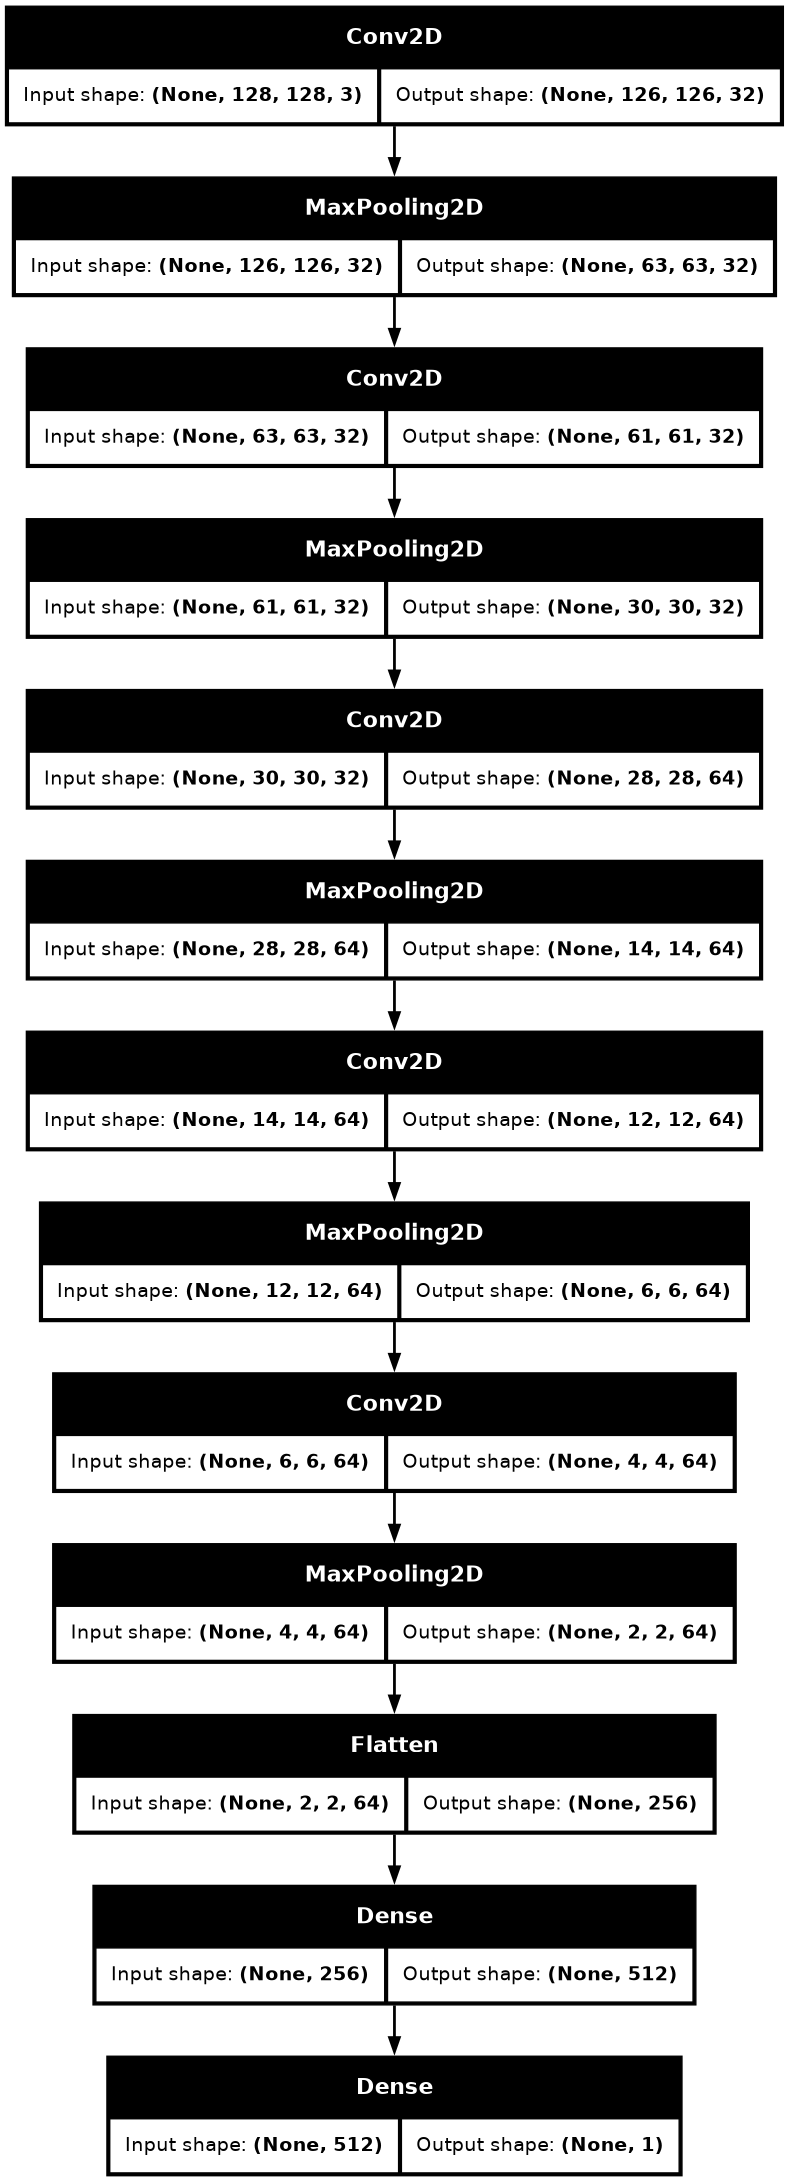

In [187]:
tf.keras.utils.plot_model(model, show_shapes=True,to_file='model.png',dpi=100)


In [188]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [189]:
history=model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5235 - loss: 0.6897 - val_accuracy: 0.5966 - val_loss: 0.6640
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6294 - loss: 0.6399 - val_accuracy: 0.6530 - val_loss: 0.6310
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6906 - loss: 0.5718 - val_accuracy: 0.6990 - val_loss: 0.5800
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7243 - loss: 0.5444 - val_accuracy: 0.7494 - val_loss: 0.5236
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7685 - loss: 0.4907 - val_accuracy: 0.7771 - val_loss: 0.4706
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7966 - loss: 0.4364 - val_accuracy: 0.7865 - val_loss: 0.4648
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8150 - loss: 0.4013 - val_accuracy: 0.8196 - val_loss: 0.4064
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8514 - loss: 0.3392 - val_accu

In [190]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.2f}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.7056
Test accuracy: 0.82


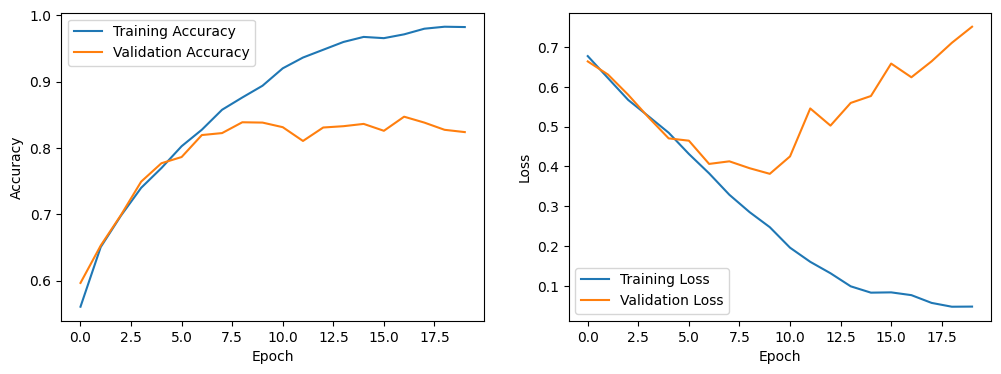

In [191]:
import matplotlib.pyplot as plt

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


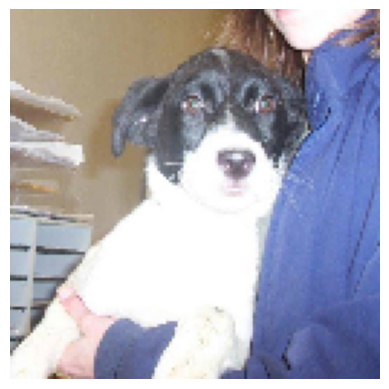

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
The image is predicted to be a Dog.


In [192]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to a test image
img_path = '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4010.jpg'

# Load the image and preprocess it
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)           # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch format
img_array = img_array / 255.0                  # Normalize image as in training

# Display the test image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict using the trained model
prediction = model.predict(img_array)

# Determine if it's a cat or dog
if prediction[0] < 0.5:
    print("The image is predicted to be a Cat.")
else:
    print("The image is predicted to be a Dog.")
